# Run the GP optimizer in four dimensions

In [1]:
%run -i ../../../examples/prepare_gp_optimizer.py

dofs = [kbv.x_rot, kbv.offz, kbh.x_rot, kbh.offz]

hard_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50], [-0.10, +0.10], [-0.50, +0.50]])

for dof in dofs:
    dof.kind = "hinted"

In [2]:
gpo = Optimizer(
    init_scheme='quasi-random', 
    n_init=8, 
    run_engine=RE, 
    db=db, 
    detector=w9, 
    detector_type='image',
    dofs=dofs, 
    dof_bounds=hard_bounds, 
    fitness_model='max_sep_density',
    training_iter=100, 
    verbose=True,
)

learning with strategy "quasi-random" ...


Run aborted
Traceback (most recent call last):
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/run_engine.py", line 1523, in _run
    msg = self._plan_stack[-1].send(resp)
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/plans.py", line 176, in list_scan
    return (yield from scan_nd(detectors, full_cycler, per_step=per_step,
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/plans.py", line 1000, in scan_nd
    return (yield from inner_scan_nd())
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/utils/__init__.py", line 1147, in dec_inner
    return (yield from plan)
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bluesky/preprocessors.py", line 952, in stage_wrapper
    return (yield from finalize_wrapper(inner(), unstage_devices()))
  File "/usr/share/miniconda3/envs/bloptools-py3.10/lib/python

/usr/share/miniconda3/envs/bloptools-py3.10/lib/python3.10/site-packages/bloptools/gp/__init__.py:336: UserWarning: max must be larger than min in range parameter.
  warnings.warn(err.args[0])


   kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
0  -0.056169  0.495434   0.053614  0.475822   7.398437
1   0.043831  0.162101   0.093614  0.271740   5.563969
2  -0.006169 -0.282343  -0.066386 -0.299688   7.922557
3   0.093831  0.384323  -0.042386  0.128883        NaN
4  -0.081169  0.050990  -0.002386 -0.156831  10.083962
5   0.018831 -0.393454   0.037614 -0.442546   9.113046
6  -0.031169  0.273212   0.077614 -0.013974   6.072216
7   0.068831 -0.060121  -0.082386  0.414597   6.924898


With four dimensions, we can no longer plot the parameter space in a satisfying way as we might be able to in two dimensions. We also have a lot more hyperparameters to deal with, and comparatively fewer points per dimension with which to infer them. One way to evaluate the state of the hyperparameters is with the Fisher information matrix, which encodes the covariance of their estimates with respect to the likelihood:

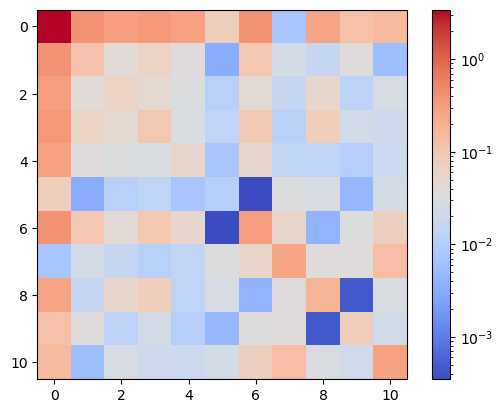

In [3]:
FM = gpo._contingent_fisher_information_matrix(gpo.test_params[0])[0]
plt.imshow(np.abs(FM), norm=mpl.colors.LogNorm())
plt.colorbar()

In particular, we can use the information matrix to sample points which will tell us the most about the hyperparameters:

In [4]:
gpo.learn(n_iter=1, n_per_iter=1, strategy='A-optimal', greedy=True, reuse_hypers=False)
gpo.learn(n_iter=1, n_per_iter=1, strategy='D-optimal', greedy=True, reuse_hypers=False)

learning with strategy "A-optimal" ...


   kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
8  -0.005389   0.33131   0.003824 -0.051421  12.534087
learning with strategy "D-optimal" ...


   kbv_x_rot  kbv_offz  kbh_x_rot  kbh_offz    fitness
9  -0.034113  0.254134   0.003084 -0.375051  11.756989


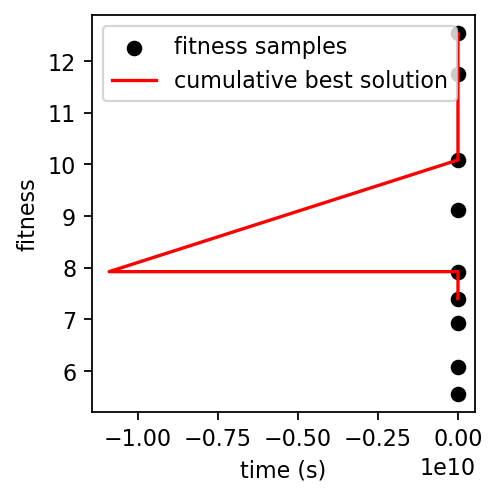

In [5]:
gpo.plot_fitness()